# Практическая работа

# Интерполяция

Пакет ```scipy.interpolation``` содержит множество разнообразных функций
и классов для интерполяции и сплайнов в одном и в нескольких измерениях.
Некоторые наиболее важные функции и классы рассматриваются в этом разделе.

## Одномерная интерполяция

Функциональность самой простой и  очевидной одномерной интерполяции
предоставляет метод ```scipy.interpolate.interp1d```. Метод принимает массивы
точек ```x``` и ```y```, а возвращает функцию, которую можно вызывать для генерации
интерполируемых значений в промежуточных точках x. По умолчанию принята линейная схема интерполяции, но возможны и другие варианты схемы (см. табл. 1), как показано в примере 1.

**Таблица 1**. Методы (схемы) интерполяции, передаваемые в аргументе ```kind``` в метод ```scipy.interpolate.inerp1d```

|kind|Описание|
|:---|:-------|
|‘linear' |Принятая по умолчанию линейная интерполяция, использующая только значения из исходных массивов данных, охватывающих требуемую точку|
|‘nearest' |«Притягивание» (привязка) к ближайшей точке данных|
|‘zero'|Сплайн нулевого порядка: интерполирует по последнему наблюдаемому значению при проходе по массивам данных|
|‘slinear' |Интерполяция сплайном первого порядка (на практике то же самое, что 'linear')|
|‘quadratic'|Интерполяция сплайном второго порядка|
|‘cubic'|Интерполяция кубическим сплайном|
|‘previous'|Используется предыдущая точка данных|
|‘next'|Используется следующая точка данных|






**Пример 1**. Этот пример демонстрирует некоторые из методик интерполяции,
доступных при использовании метода ```scipy.interpolation.interp1d``` (см. рис. 1).

**Листинг 1**. Сравнение типов одномерной интерполяции при использовании метода ```scipy.
interpolation.interp1d```

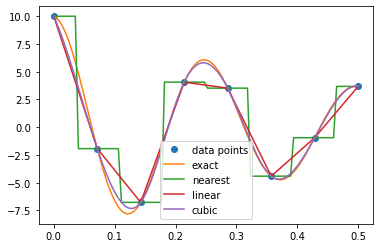

In [2]:
# eg8-interp1d.py
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
A, nu, k = 10, 4, 2
def f(x, A, nu, k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)
xmax, nx = 0.5, 8
x = np.linspace(0, xmax, nx)
y = f(x, A, nu, k)
f_nearest = interp1d(x, y, kind='nearest')
f_linear = interp1d(x, y)
f_cubic = interp1d(x, y, kind='cubic')
x2 = np.linspace(0, xmax, 100)
plt.plot(x, y, 'o', label='data points')
plt.plot(x2, f(x2, A, nu, k), label='exact')
plt.plot(x2, f_nearest(x2), label='nearest')
plt.plot(x2, f_linear(x2), label='linear')
plt.plot(x2, f_cubic(x2), label='cubic')
plt.legend()
plt.show()

**Рис. 1**. Графическое отображение различных методик одномерной интерполяции при
использовании метода ```scipy.interpolation.interp1d```

## Многомерная интерполяция

Рассмотрим два типа многомерной интерполяции, соответствующих структурированному (т.е. с данными, размещенными по сетке некоторого типа) и неструктурированному источникам данных.


## Интерполяция данных, структурированных по прямоугольной сетке

Самым простым методом двумерной интерполяции является ```scipy.interpolation.interp2d```. Для него требуется двумерный массив значений ```z``` и два одномерных массива координат ```x``` и ```y```, соответствующих значениям данных. В этих массивах не обязательно соблюдать постоянный интервал между значениями.

В аргументе ```kind``` можно передать один из трех поддерживаемых типов сплайна интерполяции: 'linear' (по умолчанию), 'cubic' или 'quintic'.

**Пример 2**. Здесь вычисляется функция

z(x,y) = sin(πx/2)e^(y/2)


по сетке из точек ```(x,y)```, которые неравномерно распределены по направлению ```y```. Затем используется метод ```scipy.interpolate.interp2d``` для интерполяции этих значений в  более гладкую, равномерно распределенную сетку ```(x,y)``` (см. рис.2).

**Листинг 2**. Двумерная интерполяция с  использованием метода ```scipy.interpolation.
interp2d```

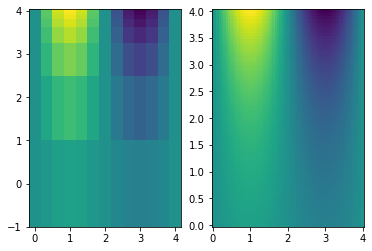

In [5]:
# eg8-interp2d.py
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 13)
y = np.array([0, 2, 3, 3.5, 3.75, 3.875, 3.9375, 4])
X, Y = np.meshgrid(x, y)
Z = np.sin(np.pi*X/2) * np.exp(Y/2)
x2 = np.linspace(0, 4, 65)
y2 = np.linspace(0, 4, 65)
f = interp2d(x, y, Z, kind='cubic')
Z2 = f(x2, y2)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pcolormesh(X, Y, Z)
X2, Y2 = np.meshgrid(x2, y2)
ax[1].pcolormesh(X2, Y2, Z2)
plt.show()

**Рис. 2**. Двумерная интерполяция с использованием метода ```scipy.interpolation.interp2d```

Обратите внимание: для метода ```interp2d``` требуются одномерные массивы ```x``` и ```y```.


Если набор координат ```(x,y)``` образует равномерно распределенную сетку, то самым быстрым способом интерполяции значений из массива ```z``` является использование объекта ```scipy.interpolate.RectBivariateSpline```, как показано в примере 3.


**Пример 3**. В коде из листинга 2 вычисляется функция

z(x,y) = e^(−4x^2)*e^(−y^2/4)

по равномерной крупной сетке, затем выполняется интерполяция по сетке с более мелким шагом (см. рис. 3).

**Листинг  3**. Интерполяция с  переходом к  уплотненной равномерной двумерной сетке
с использованием объекта ```scipy.interpolate.RectBivariateSpline```



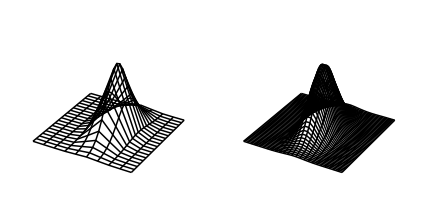

In [7]:
# eg8-RectBivariateSpline.py
import numpy as np
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Равномерная сетка с укрупненным шагом.
dx, dy = 0.4, 0.4
xmax, ymax = 2, 4
x = np.arange(-xmax, xmax, dx)
y = np.arange(-ymax, ymax, dy)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(2*X)**2 - (Y/2)**2)
interp_spline = RectBivariateSpline(y, x, Z)
# Равномерная сетка с более мелким шагом.
dx2, dy2 = 0.16, 0.16
x2 = np.arange(-xmax, xmax, dx2)
y2 = np.arange(-ymax, ymax, dy2)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = interp_spline(y2, x2)
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': '3d'})
ax[0].plot_wireframe(X, Y, Z, color='k')
ax[1].plot_wireframe(X2, Y2, Z2, color='k')
for axes in ax:
    axes.set_zlim(-0.2, 1)
    axes.set_axis_off()
fig.tight_layout()
plt.show()

**Рис. 3**. Двумерная интерполяция с переходом от крупной прямоугольной сетки
(изображение слева) к сетке с более мелким шагом (изображение справа) с использованием
объекта ```scipy.interpolate.RectBivariateSpline```

Обратите внимание: для функции ```Z```, определяемой здесь с использованием настройки ```meshgrid```, метод ```RectBivariateSpline``` ожидает передачи соответствующих массивов y и x именно в таком порядке (в отличие от метода interp2d).

## Интерполяция неструктурированных данных

Для интерполяции неструктурированных данных,т. е.точек данных,размещенных в произвольных координатах ```(x,y)``` сетки, можно использовать метод ```scipy.interpolate.griddata```. Основной способ применения для двух измерений:

```scipy.interpolate.griddata(points, values, xi, method='linear')```

где предоставляемые данные передаются как одномерный массив ```values``` с координатами ```points```, который передается как кортеж массивов ```x``` и ```y```  или как один массив формы ```(n, 2)```, где ```n``` – длина массива ```values```. Объект ```xi``` – это массив координатной сетки, по которой выполняется интерполяция (форма этого массива ```(m, 2)```). Доступные методики (типы) интерполяции: 'linear' (по умолчанию), 'nearest' и 'cubic'.


**Пример 4**. Код в листинге 4 демонстрирует применение различных типов
(методик) интерполяции, доступных для ```scipy.interpolate.griddata```, с использованием 400 точек, случайно выбранных из исследуемой функции. Результаты можно
сравнить по рис. 4.

**Листинг 4**. Интерполяция по неструктурированному массиву двумерных точек с использованием ```scipy.interpolate.griddata```

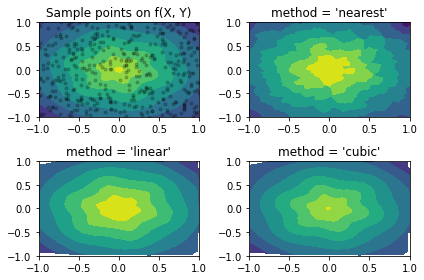

In [9]:
# eg8-gridinterp.py
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s * (1 - s) / 5 * np.sin(6 * phi)
    return 5 * (1 - tau) + tau

T = f(X, Y)
# Выбор npts случайных точек из дискретной области значений моделируемой функции.
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)
fig, ax = plt.subplots(nrows=2, ncols=2)
# Построение графика моделируемой функции и случайно выбранной группы точек.
ax[0, 0].contourf(X, Y, T)
ax[0, 0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0, 0].set_title('Sample points on f(X, Y)')
# Интерполяция с использованием трех различных методик и построение графика.
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px, py), (X, Y), method=method)
    r, c = (i + 1) // 2, (i + 1) % 2
    ax[r, c].contourf(X, Y, Ti)
    ax[r, c].set_title("method = '{}'".format(method))
fig.tight_layout()
plt.show()

**Рис. 4**. Некоторые различные схемы интерполяции для метода ```scipy.interpolate.griddata```

**Задание**: реализовать примеры